# 1. 데이터 가져오기

In [111]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


터미널에 ~/data/data/bike-sharing-demand경로에 train.csv 데이터를 train 변수로 가져와야 하는데 터미널에 무엇을 입력해야 하는지 모르겠다.  
주피터로 train 변수로 가져오는 것은 성공.  
표로 시각화 했더니 총 10886개의 행과 12개의 열로 구성되어있다. 

# 2. 6가지 컬럼 생성하기

In [76]:
# datetime 자료형으로 변환
train['dt'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [77]:
# 연, 월, 일, 시, 분, 초 6가지 컬럼 생성하기
train['year']=train['dt'].dt.year
train['month']=train['dt'].dt.month
train['day']=train['dt'].dt.day
train['hour']=train['dt'].dt.hour
train['minute']=train['dt'].dt.minute
train['second']=train['dt'].dt.second

# 3. 데이터 개수 시각화하기 

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='second', ylabel='count'>

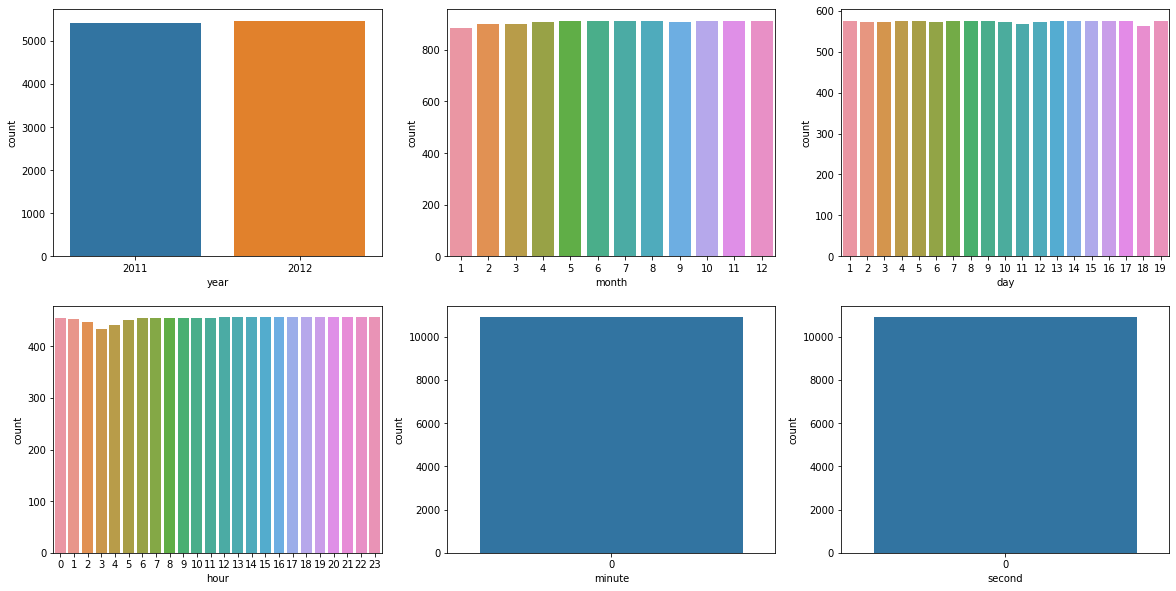

In [79]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10)) #ncols는 행의 개수, nrows는 열의 개수, figsize로 그래프 크기 조정 가능
sns.countplot(x="year", data=train, ax=ax[0,0])
sns.countplot(x="month", data=train, ax=ax[0,1])
sns.countplot(x="day", data=train, ax=ax[0,2])
sns.countplot(x="hour", data=train, ax=ax[1,0])
sns.countplot(x="minute", data=train, ax=ax[1,1])
sns.countplot(x="second", data=train, ax=ax[1,2])

오잉?! minute랑 second는 그래프 모양이 왜이래?? 그리고 day는 1일에서 19일밖에 없다.. 데이터 누락인건가..

# 4. X,y 컬럼 선택 및 train/test 데이터 분리

In [97]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dt,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01 00:00:00,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01 01:00:00,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01 02:00:00,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01 03:00:00,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01 04:00:00,2011,1,1,4,0,0


In [101]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 
           'dt', 'year', 'month', 'day', 'hour', 'minute', 'second']].values
y = train['count'].values

In [102]:
X.shape

(10886, 15)

In [103]:
y.shape

(10886,)

In [104]:
import numpy as np

np.array(X)

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 2, 0, 0],
       ...,
       [4, 0, 1, ..., 21, 0, 0],
       [4, 0, 1, ..., 22, 0, 0],
       [4, 0, 1, ..., 23, 0, 0]], dtype=object)

In [105]:
np.array(y)

array([ 16,  40,  32, ..., 168, 129,  88])

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 15) (8708,)
(2178, 15) (2178,)


ValueError: Found input variables with inconsistent numbers of samples: [9, 5] :  
필요없는 데이터 한줄을 지우고 X, y의 shape을 일치시킨 후, train_test_split을 하니 아주 잘 데이터가 나누어졌다.

# 5. LinearRegression 모델 학습

In [107]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [110]:
model.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [109]:
predictions = model.predict(X_test)
predictions

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.